<a href="https://colab.research.google.com/github/faizaslam11/ECG_model_arrhythmia/blob/main/CNN%2BLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/mitbih_train.csv
/content/mitbih_test.csv
/content/.config/.last_survey_prompt.yaml
/content/.config/default_configs.db
/content/.config/active_config
/content/.config/.last_update_check.json
/content/.config/config_sentinel
/content/.config/gce
/content/.config/.last_opt_in_prompt.yaml
/content/.config/logs/2024.05.30/13.36.15.385607.log
/content/.config/logs/2024.05.30/13.30.33.059431.log
/content/.config/logs/2024.05.30/13.36.03.155708.log
/content/.config/logs/2024.05.30/13.23.26.998698.log
/content/.config/logs/2024.05.30/13.36.16.059291.log
/content/.config/logs/2024.05.30/13.30.21.274210.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv


In [19]:
# import train set of the MIT-BIH Arrhythmia Dataset
mit_train = pd.read_csv('/content/mitbih_train.csv',
                          header=None)

print('The shape of train dataset :', mit_train.shape)
mit_train.head()

The shape of train dataset : (87554, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# import test set of the MIT-BIH Arrhythmia Dataset
mit_test = pd.read_csv('/content/mitbih_test.csv',
                          header=None)

print('The shape of test dataset :', mit_test.shape)
mit_test.head()

The shape of test dataset : (21892, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Check the labels in both train and test set
print('train set classes: ', mit_train.iloc[:, -1].unique())
print('train set classes: ', mit_test.iloc[:, -1].unique())

train set classes:  [0. 1. 2. 3. 4.]
train set classes:  [0. 1. 2. 3. 4.]


In [22]:
# Change the dtype of label column to integer
mit_train[187] = mit_train[187].astype('int64')

mit_test[187] = mit_test[187].astype('int64')

In [23]:
mit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(187), int64(1)
memory usage: 125.6 MB


In [24]:
mit_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [25]:
# Check for missing values
pd.set_option('display.max_rows', None)
mit_train.isna().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [26]:
# See the number of each class in train dataset
labels = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}

# Calculate value counts and rename index using the labels dictionary
value_counts = mit_train.iloc[:,-1].value_counts().rename(labels)

# Create the bar plot to see the count of labels
bar_fig = px.bar(x=value_counts.index, y=value_counts.values,
                labels = {'x':'Labels', 'y':'Counts'},
                 text_auto=True,
                 title="The Count of Each Label in The Train Dataset"
                )

pie_fig = px.pie(names=value_counts.index, values=value_counts.values,
                 title="The Percentage of Each Label in The Train Dataset")

bar_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.update_layout(title_x=0.5, width=800, height=600)
bar_fig.show()
pie_fig.show()

In [27]:
# See the number of each class in test dataset

# Calculate value counts and rename index using the labels dictionary
value_counts = mit_test.iloc[:,-1].value_counts().rename(labels)

# Create the bar plot to see the count of labels
bar_fig = px.bar(x=value_counts.index, y=value_counts.values,
                labels = {'x':'Labels', 'y':'Counts'},
                 text_auto=True,
                 title="The Count of Each Label in The Test Dataset"
                )

pie_fig = px.pie(names=value_counts.index, values=value_counts.values,
                 title="The Percentage of Each Label in The Test Dataset")

bar_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.update_layout(title_x=0.5, width=800, height=600)
bar_fig.show()
pie_fig.show()

<Axes: title={'center': 'ECG of First Person'}>

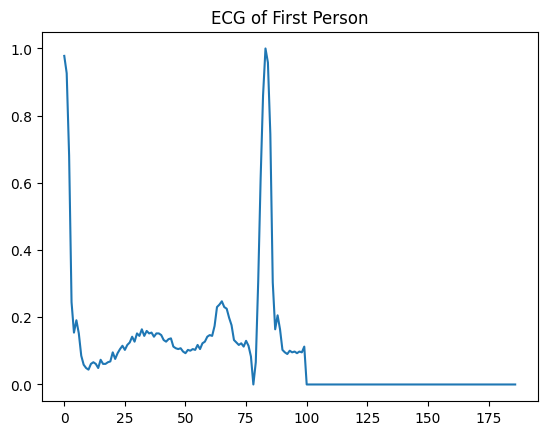

In [28]:
mit_train.iloc[0, :187].plot(title='ECG of First Person')

In [29]:
# generate a random integer
n = random_index = np.random.randint(100)

ecg_0 = mit_train.loc[mit_train[187]==0, :].iloc[n,:187]
ecg_1 = mit_train.loc[mit_train[187]==1, :].iloc[n,:187]
ecg_2 = mit_train.loc[mit_train[187]==2, :].iloc[n,:187]
ecg_3 = mit_train.loc[mit_train[187]==3, :].iloc[n,:187]
ecg_4 = mit_train.loc[mit_train[187]==4, :].iloc[n,:187]

ecg_df = pd.DataFrame({'Normal': ecg_0,
                       'Artial Premature': ecg_1,
                       'Premature ventricular contraction': ecg_2,
                       'Fusion of ventricular and normal': ecg_3,
                       'Fusion of paced and normal': ecg_4})

In [30]:
ecg_plot = px.line(ecg_df,
                  labels={'index':'Time Intervals', 'value':'Amplitude (mV)', 'variable':'Categories'},
                  title="One ECG form Each Category")
ecg_plot.update_layout(title_x=0.25, width=1000, height=500)
ecg_plot.show()

In [31]:
from imblearn.over_sampling import RandomOverSampler

data = mit_train.iloc[:, :187]
labels = mit_train.iloc[:, 187]

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the data
data_resampled, labels_resampled = ros.fit_resample(data, labels)

train_df = pd.concat([data_resampled, labels_resampled], axis=1)

train_df.shape

(362355, 188)

In [32]:
labels = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}

# Calculate value counts and rename index using the labels dictionary
value_counts = train_df.iloc[:,-1].value_counts().rename(labels)

# Create the bar plot to see the count of labels
bar_fig = px.bar(x=value_counts.index, y=value_counts.values,
                labels = {'x':'Labels', 'y':'Counts'},
                 text_auto=True,
                 title="The Count of Each Label After Balancing"
                )

pie_fig = px.pie(names=value_counts.index, values=value_counts.values,
                 title="The Percentage of Each Label After Balancing")

bar_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.update_layout(title_x=0.5, width=800, height=600)
bar_fig.show()
pie_fig.show()

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_df.iloc[:, :187],
                                                train_df.iloc[:, 187],
                                                test_size= 0.2,
                                                stratify=train_df.iloc[:, 187],
                                                random_state=42)

x_test = mit_test.iloc[:, :187]
y_test = mit_test.iloc[:, 187]

In [34]:
# Select an array of data instead of dataframe
x_train = x_train.values
x_val = x_val.values
x_test = x_test.values

In [35]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_val shape: ', x_val.shape)
print('y_val shape: ', y_val.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (289884, 187)
y_train shape:  (289884,)
x_val shape:  (72471, 187)
y_val shape:  (72471,)
x_test shape:  (21892, 187)
y_test shape:  (21892,)


In [36]:
# Reshape datasets to use them in CNN
x_train = x_train.reshape(x_train.shape[0], -1, 1)
x_val = x_val.reshape(x_val.shape[0], -1, 1)
x_test = x_test.reshape(x_test.shape[0], -1, 1)

In [37]:
import tensorflow as tf

# Converts a class vector (integers) to binary class matrix (one hot encoder).

y_train = tf.keras.utils.to_categorical(y_train)

y_val = tf.keras.utils.to_categorical(y_val)

y_test = tf.keras.utils.to_categorical(y_test)

In [38]:
# See some samples of data
print(y_train[-1])
print(y_val[-1])
print(y_test[-1])

[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1.]


In [39]:
# Check the dataset dimensions again
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_val shape: ', x_val.shape)
print('y_val shape: ', y_val.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (289884, 187, 1)
y_train shape:  (289884, 5)
x_val shape:  (72471, 187, 1)
y_val shape:  (72471, 5)
x_test shape:  (21892, 187, 1)
y_test shape:  (21892, 5)


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, MaxPool1D, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [41]:
model_cnn_lstm = Sequential([
    Input(shape=(x_train.shape[1:])),

    Conv1D(64, kernel_size=6, activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=3, strides=2, padding="same"),

    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2, strides=2, padding="same"),

    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2, strides=2, padding="same"),

    LSTM(64, return_sequences=True, activation="tanh"),

    LSTM(32, activation="tanh"),

    Flatten(),

    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
    ])

model_cnn_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 182, 64)           448       
                                                                 
 batch_normalization (Batch  (None, 182, 64)           256       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 91, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 89, 64)            12352     
                                                                 
 batch_normalization_1 (Bat  (None, 89, 64)            256       
 chNormalization)                                                
                                                        

In [42]:
model_cnn_lstm.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [44]:
callbacks = [EarlyStopping(monitor='val_loss',
                           patience=8),
             ReduceLROnPlateau(patience=20,
                               monitor='val_loss',
                               min_lr=1e-6,
                               cool_down=20),
             ModelCheckpoint(filepath=r'C:\Users\zaida\Downloads\archive',
                             monitor='val_loss',
                             save_best_only=True)]

In [45]:
history = model_cnn_lstm.fit(x_train, y_train,
                        epochs=10,
                        callbacks=callbacks,
                        batch_size=32,
                        validation_data=(x_val, y_val),
                       verbose=1)

Epoch 1/10
9059/9059 [==============================] - 663s 72ms/step - loss: 0.1943 - accuracy: 0.9301 - val_loss: 0.2086 - val_accuracy: 0.9261 - lr: 0.0010
Epoch 2/10
9059/9059 [==============================] - 669s 74ms/step - loss: 0.0663 - accuracy: 0.9781 - val_loss: 0.0454 - val_accuracy: 0.9846 - lr: 0.0010
Epoch 3/10
9059/9059 [==============================] - 654s 72ms/step - loss: 0.0429 - accuracy: 0.9862 - val_loss: 0.0435 - val_accuracy: 0.9865 - lr: 0.0010
Epoch 4/10
9059/9059 [==============================] - 646s 71ms/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0351 - val_accuracy: 0.9891 - lr: 0.0010
Epoch 5/10
9059/9059 [==============================] - 639s 71ms/step - loss: 0.0260 - accuracy: 0.9919 - val_loss: 0.0413 - val_accuracy: 0.9877 - lr: 0.0010
Epoch 6/10
9059/9059 [==============================] - 703s 78ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.0208 - val_accuracy: 0.9935 - lr: 0.0010
Epoch 7/10
9059/9059 [==================

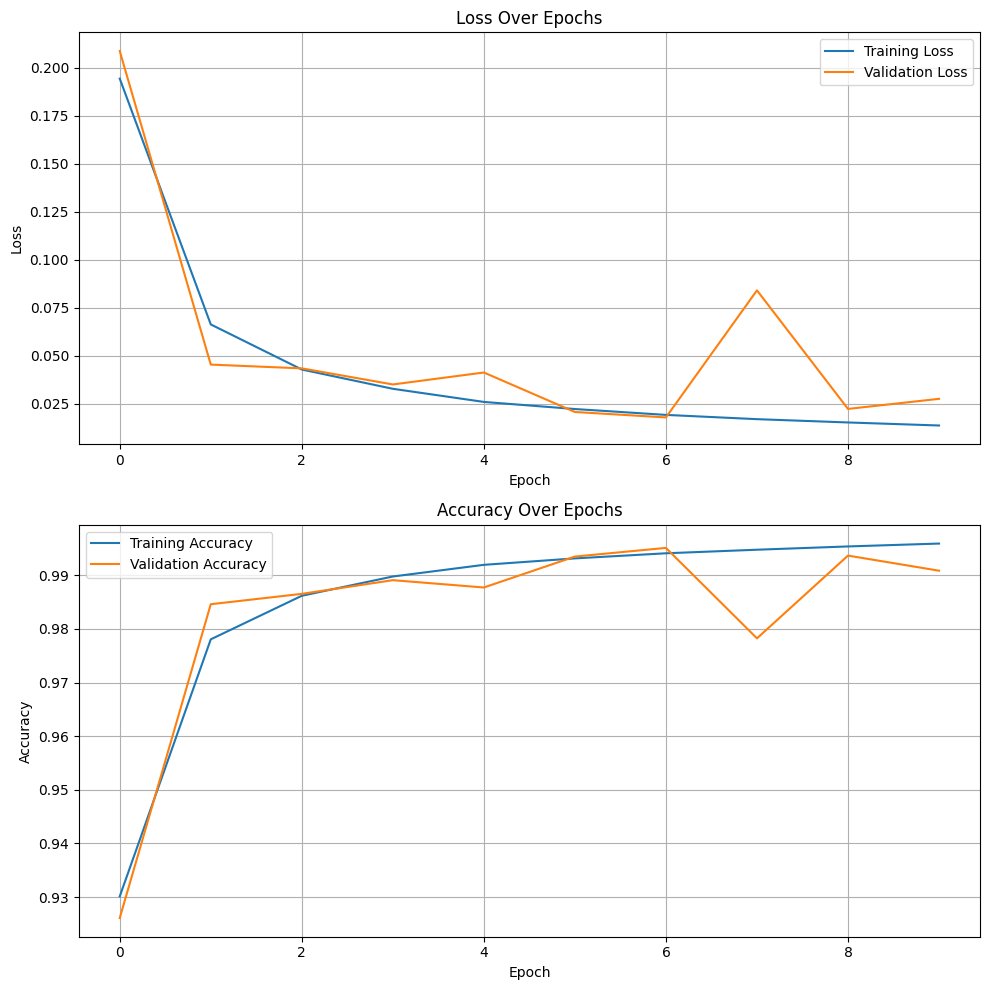

In [46]:
# Plot loss and accuracy of the model
fig, axs = plt.subplots(2, figsize=(10, 10))

# Plot loss
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss Over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Plot accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy Over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [47]:
# Comprison between the accuracy of model on train and validation datasets
train_score = model_cnn_lstm.evaluate(x_train, y_train)
validation_score = model_cnn_lstm.evaluate(x_val, y_val)

print('Accuracy Train data: ', train_score[1])
print('Accuracy Validation data: ', validation_score[1])

2265/2265 [==============================] - 41s 18ms/step - loss: 0.0276 - accuracy: 0.9909
Accuracy Train data:  0.9916759729385376
Accuracy Validation data:  0.9908515214920044


In [48]:
# Predict on the test data
y_pred = model_cnn_lstm.predict(x_test)


685/685 [==============================] - 15s 16ms/step


In [49]:
from sklearn.metrics import classification_report

# Convert one-hot encoded labels to integer labels
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.78      0.86      0.82       556
           2       0.92      0.97      0.94      1448
           3       0.72      0.83      0.77       162
           4       0.99      0.99      0.99      1608

    accuracy                           0.98     21892
   macro avg       0.88      0.93      0.90     21892
weighted avg       0.98      0.98      0.98     21892



In [50]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels,
                      normalize='true'
                     )

labels = ['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Fusion of ventricular and normal', 'Fusion of paced and normal']

cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot confusion matrix
cm_fig = px.imshow(cm_df,
                labels=dict(x="Predicted", y="True", color="Count"),
                x=labels,
                y=labels,
                text_auto=True,
                title='Confusion Matrix',
                color_continuous_scale='Blues'
               )
cm_fig.update_layout(title_x=0.5, width=800, height=600)
cm_fig.show()